# Binary Logistic Regression / Classification 

## Background
Binary classification is one of the most fundamental and common tasks in machine learning and deep learning. 
At its core, it's a supervised learning problem where the goal is to categorize input data into one of two possible classes or categories. 
Think of it as teaching a machine to make a "yes" or "no" decision.
Examples of binary classification's applications are:

- Spam Detection: Classifying an email as either 'spam' or 'not spam'.
- Medical Diagnosis: Determining if a patient has a certain disease.
- Credit Scoring: Deciding whether a loan applicant is a 'good credit risk' or a 'bad credit risk'.

A sigmoid activated multi-input, single-output linear model is a decent candidate for this job.
In this practice, you'll train such a model to categorize samples from a toy dataset into two classes.

## Objectives
- Train a simple neural network model.
    - Apply sigmoid activation on a linear model.
    - Implement binary cross entropy evaluation.
    - Practice vectorized computing.
- Assess model's performance using a variety of metrics.


## Exercises:

1. <font color=#582C83>(5%) Data Pre-Processing</font>
2. <font color=#582C83>(10%) Model Creation</font>
3. <font color=#582C83>(20%) Model Assessment</font>
4. <font color=#582C83>(10%) Gradient of BCE Loss</font>
5. <font color=#582C83>(30%) Gradient Descent Model Optimization</font>
6. <font color=#582C83>(25%) Classification Metrics</font>


## 1. Load and Pre-Process Training Dataset

The dataset, 
$$\mathcal{D} = \{\mathbf{X}, \mathbf{y}\} = \begin{bmatrix} ^{(1)} \mathbf{x} & ^{(1)} y \\ ^{(2)} \mathbf{x} & ^{(2)} y \\ \vdots \\ ^{(M)} \mathbf{x} & ^{(M)} y \end{bmatrix}$$
consists $M$ samples.

Each sample has $N$ features: $^{(i)} \mathbf{x} = [^{(i)} x_1, ^{(i)} x_2, \dots, ^{(i)} x_N]$ and is labeled as $^{(i)} y \in \{0, 1\}$, where $i \in \{1, 2, ..., M\}$.

In this practice, we make a toy dataset using [scikit-learn](https://scikit-learn.org/stable/index.html)'s [datasets](https://scikit-learn.org/stable/api/sklearn.datasets.html) module. 
The dataset has $M=2048$ samples, and $N=2$ features. 

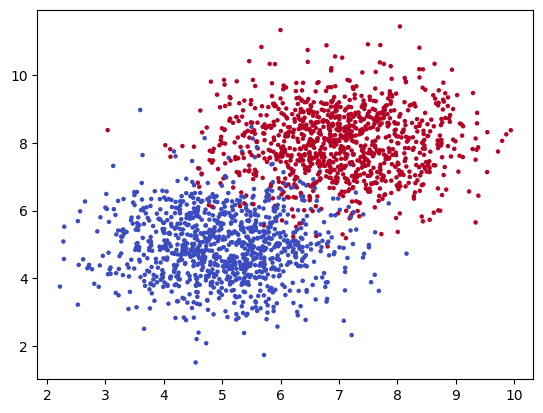

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

features_raw, labels_raw = make_blobs(n_samples=2048, centers=np.array([[5, 5], [7, 8]]), cluster_std=1.0, random_state=3321)
# Visualize the raw data
plt.scatter(
    features_raw[:, 0], # feature 1 values (x coords)
    features_raw[:, 1], # feature 2 values (y coords)
    s=5*np.ones(labels_raw.size), # marker size all set to 1
    c=labels_raw, # colorized labels: 0:blue, 1:red
    cmap='coolwarm'  # color map
)


### <font color=#582C83>(5%) Exercise 1: Data Pre-Processing</font>
1. In machine learning, it is prefered to scale features into the same range: $[0, 1]$.
2. To avoid dimension mismatch, reshape features and labels array into two dimensions is recommended.

Samples of pre-processed features:
 [[0.60810041 0.36828791]
 [0.85139165 0.63786153]
 [0.57346525 0.38949334]
 [0.77146837 0.71406137]]
Samples of pre-processed labels:
 [[0]
 [1]
 [0]
 [1]]
Shape of pre-processed features:
 (2048, 2).
Shape of pre-processed labels:
 (2048, 1)


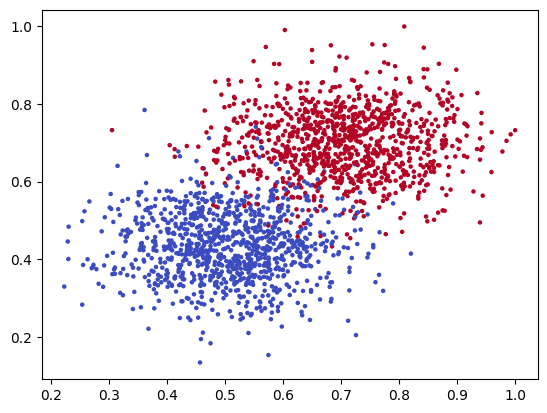

In [2]:
### START CODING HERE ### (≈ 2 lines of code)
features_train = features_raw / features_raw.max(axis=0)  # Scale features to [0, 1]
labels_train = labels_raw.reshape(-1, 1)  # Reshape labels to be a column vector
### END CODING HERE ### 

# Sanity check
print(f"Samples of pre-processed features:\n {features_train[-4:]}")
print(f"Samples of pre-processed labels:\n {labels_train[-4:]}")  # Print last 4 samples of features and labels
print(f"Shape of pre-processed features:\n {features_train.shape}.")
print(f"Shape of pre-processed labels:\n {labels_train.shape}")  # Print shapes of features and labels   

# Visualize
plt.scatter(
    features_train[:, 0], 
    features_train[:, 1], 
    s=5*np.ones(labels_train.size), 
    c=labels_train, 
    cmap='coolwarm'  # color map
)

**Expected Outcomes**:
```console
Samples of pre-processed features:
 [[0.60810041 0.36828791]
 [0.85139165 0.63786153]
 [0.57346525 0.38949334]
 [0.77146837 0.71406137]]
Samples of pre-processed labels:
 [[0]
 [1]
 [0]
 [1]]
Shape of pre-processed features:
 (2048, 2).
Shape of pre-processed labels:
 (2048, 1)
``` 

## 2. Create a Non-linear Multi-Input Single-Output Model
Let's create a nonlinear model by applying a sigmoid function to the output of a linear model.

$$\mathbf{\hat{y}} = \sigma (\mathbf{X} \cdot \mathbf{w}^T + \mathbf{b}) = \sigma(\mathbf{Z})$$

The sigmoid function can be represented as,

$$\sigma(\mathbf{Z}) = \frac{1}{1 + e^{-\mathbf{Z}}}$$

The linear part of the model is governed by a parameter vector 
$$\mathbf{w} = [w_1, w_2, ..., w_N]_{(1, N)}$$

and a bias vector 
$$\mathbf{b} = \begin{bmatrix} b \\ b \\ \vdots \\ b \end{bmatrix}_{(M, 1)}$$

And, in this practice $M=2048$ and $N=2$

### <font color=#582C83>(10%) Exercise 2: Model Creation</font>
Let's translate math to code. 

Samples of dummy prediction:
 [[0.70737278]
 [0.63519949]
 [0.68833004]
 [0.5703847 ]]


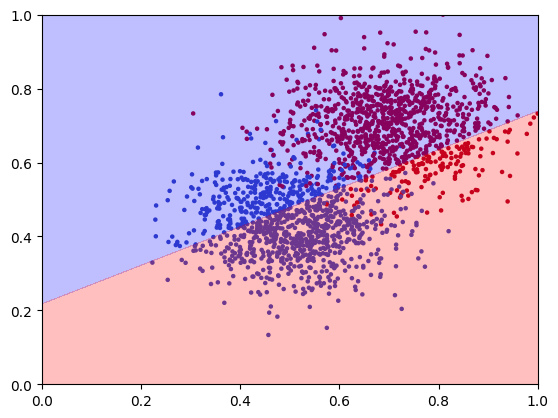

In [3]:
def forward(in_features, weights, bias):
    """
    Compute the linear combination of inputs and weights plus bias.
    
    Args:
        in_features (np.ndarray): Input features of shape (M, N).
        weights (np.ndarray): Weights of shape (1, N).
        bias (float): Bias term.  
    Returns:
        predictions: Linear combination result of shape (M, 1).
    """
    ### START CODING HERE ### (≈ 2 lines of code)
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    predictions = sigmoid(in_features.dot(weights.T) + bias)
    return predictions
    ### END CODING HERE ###

# Sanity check
w_dummy = np.array([[1.2, -2.3]])
b_dummy = 1.0
print(f"Samples of dummy prediction:\n {forward(features_train, w_dummy, b_dummy)[-4:]}")  # Print last 4 samples of dummy prediction

# Visualize dummy model decision boundary
plt.scatter(features_train[:, 0], features_train[:, 1], s=5*np.ones(labels_train.size), c=labels_train, cmap='coolwarm')
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(0., 1., 300),
                     np.linspace(0., 1., 300))
zz = w_dummy[0, 0] * xx + w_dummy[0, 1] * yy + b_dummy - 0.5
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.25)


**Expected Outcomes**:
>
```console
Samples of dummy prediction:
 [[0.70737278]
 [0.63519949]
 [0.68833004]
 [0.5703847 ]]
```

## 3. Evaluate Model
As same as the linear regression, we need to evaluate model performance. 
It is OK to use a Mean Squared Error (MSE) function to compute the model loss. 
It is **recommended** to use a Binary Cross Entropy (BCE) function to assess the model for a binary classification problem. 
Binary Cross Entropy (BCE) is a differentiable metric.
$$\mathcal{L}(\mathbf{\hat{y}}, \mathbf{y}) = \frac{1}{M} \Sigma [-\mathbf{y} \log \hat{\mathbf{y}} - (1 - \mathbf{y}) \log(1 - \hat{\mathbf{y}})]$$

There are other useful metrics, such as accuracy. But they are not differentiable.
Let $TP$ be number of true positive predictions, $TN$ be number of true negative predictions, $FP$ be number of false positive predictions, $FN$ be number of false negative predictions.
The accuracy can be calculated by:
$$Accuracy = \frac{TP + TN}{TP+FP+TN+FN}$$

### <font color=#582C83>(20%) Exercise 3: Model Assessment</font>
1. Evaluate model loss with BCE.
2. Assess model predictions accuracy.

In [12]:
def bce_loss(predictions, labels):
    """
    Compute the Binary Cross Entropy (BCE) loss.
    
    Args:
        predictions (np.ndarray): Predicted probabilities of shape (M, 1).
        labels (np.ndarray): True binary labels of shape (M, 1).
    Returns:
        loss: BCE loss value (float).
    """
    ### START CODING HERE ### (≈ 1 line)
    loss = -labels * np.log(predictions) - (1 - labels) * np.log(1 - predictions)
    return loss
    ### END CODING HERE ###

def accuracy(predictions, labels):
    """
    Compute the accuracy of predictions.
    
    Args:
        predictions (np.ndarray): Predicted probabilities of shape (M, 1).
        labels (np.ndarray): True binary labels of shape (M, 1).
    Returns:
        acc: Accuracy value (float).
    """
    ### START CODING HERE ### (≈ 2 lines)
    predicted_classes = np.mean(predictions >= 0.5).astype(int)  # Convert probabilities to binary classes
    acc = (predicted_classes == labels_train).mean()
    return acc
    ### END CODING HERE ###

# Sanity check
preds_dummy = forward(features_train, w_dummy, b_dummy)
print(f"Dummy model BCE loss: {bce_loss(preds_dummy, labels_train)}")
print(f"Dummy model accuracy: {accuracy(preds_dummy, labels_train) * 100}%")

Dummy model BCE loss: [[1.20069743]
 [0.47096323]
 [0.55877852]
 ...
 [0.45381617]
 [1.16581047]
 [0.56144423]]
Dummy model accuracy: 50.0%


**Expected Output**:
>
```console
Dummy model BCE loss: 0.8189666983092332
Dummy model accuracy: 42.67578125%
```

## 4. Compute Gradient of Loss
Compute gradient of the BCE loss:

$$\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \begin{bmatrix} \frac{\partial \mathcal{L}}{\partial w_1} & \frac{\partial \mathcal{L}}{\partial w_2} & \dots & \frac{\partial \mathcal{L}}{\partial w_N} \end{bmatrix} = \frac{1}{M} (\hat{\mathbf{y}} - \mathbf{y})^T \cdot \mathbf{X}$$
$$\frac{\partial \mathcal{L}}{\partial b}  = \overline{\hat{\mathbf{y}} - \mathbf{y}} $$

### <font color=#582C83>(10%) Exercise 4: Gradient of BCE Loss</font>

In [ ]:
def gradient(predictions, labels, in_features):
    """
    Compute the gradient of the BCE loss with respect to weights and bias.
    
    Args:
        predictions (np.ndarray): Predicted probabilities of shape (M, 1).
        labels (np.ndarray): True binary labels of shape (M, 1).
        in_features (np.ndarray): Input features of shape (M, N).
    Returns:
        dw: Gradient with respect to weights of shape (1, N).
        db: Gradient with respect to bias (float).
    """
    ### START CODING HERE ### (≈ 3 lines of code)
    M = None  # Number of samples
    dw = None  # Gradient w.r.t. weights
    db = None  # Gradient w.r.t. bias
    return dw, db
    ### END CODING HERE ###

# Sanity check
dw_dummy, db_dummy = gradient(preds_dummy, labels_train, features_train)
print(f"Dummy model gradient w.r.t. weights: {dw_dummy}, shape: {dw_dummy.shape}")
print(f"Dummy model gradient w.r.t. bias: {db_dummy}")

**Expected Output**:
>
```console
Dummy model gradient w.r.t. weights: [[ 0.01011904 -0.01882587]], shape: (1, 2)
Dummy model gradient w.r.t. bias: 0.10192657501589689
```

## 5. Update Model Parameters


By tweaking the model parameters along the gradient a small step (learning rate, $\alpha$) iteratively, we expect to bring the BCE loss down to a reasonable scale.

- $\text{Initialize } \mathbf{w} \text{ and } b$
- $\text{Repeat until converge}$
    - $\mathbf{w} = \mathbf{w} - \alpha \frac{\partial \mathcal{L}}{\partial \mathbf{w}}$
    - $b = b - \alpha \frac{\partial \mathcal{L}}{\partial b}$

    

### <font color=#582C83>(30%) Exercise 5: Gradient Descent Model Optimization</font>
1. Initialize weights and bias
2. Set learning rate and number of iterations
3. Repeat following steps:

    1. Make predictions
    2. Assess model
    3. Compute gradient of loss
    4. Update weights and bias

<font color=red>**Note: bring training accuracy over 95% within 10000 iterations**</font>


In [ ]:
# START CODING HERE ### (≈ 10 lines of code)
# Initialize parameters
w = None  # Initialize weights
b = None  # Initialize bias

# Set hyperparameters
learning_rate = None
num_iters = None

# Reserve loss and accuracy storage
losses_train = []
accuracies_train = []

# Training loop
for i in range(num_iters):
    preds_train = None  # Make predictions
    loss_train = None  # Assess model loss
    acc_train = None  # Assess model accuracy
    print(f"Iteration {i+1}/{num_iters}, Loss: {loss_train:.4f}, Accuracy: {acc_train*100:.2f}%")
    losses_train.append(loss_train)
    accuracies_train.append(acc_train)
    dw, db = None  # Compute gradient of loss
    w = None  # Update weights
    b = None  # Update bias

### END CODING HERE ###

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_train, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('BCE Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(np.array(accuracies_train) * 100, label='Training Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy over Iterations')
plt.legend()   

In [ ]:
# Visualize decision boundary after training
plt.scatter(features_train[:, 0], features_train[:, 1], s=5*np.ones(labels_train.size), c=labels_train, cmap='coolwarm')
xx, yy = np.meshgrid(np.linspace(0., 1., 300),
                     np.linspace(0., 1., 300))
zz = w[0, 0] * xx + w[0, 1] * yy + b - 0.5
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.25)
plt.title('Decision Boundary after Training')

## 5. Evaluate Model with a New Dataset
Let's generate a similar dataset using [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) as used in the beginning of this practice.
Make predictions and evaluate model with this newly generated dataset.


In [ ]:
# Accuracy on training data
X_raw, y_raw = make_blobs(n_samples=512, centers=np.array([[5, 5], [7, 8]]), cluster_std=1.0,)
features_test = X_raw / X_raw.max(axis=0)  # Scale features to [-1, 1]
labels_test = y_raw.reshape(-1, 1)  # Reshape labels to be a column vector

# Visualize test data
plt.scatter(
    features_test[:, 0], 
    features_test[:, 1], 
    s=5*np.ones(labels_test.size), 
    c=labels_test, 
    cmap='managua'  # color map
)
# Visualize decision boundary on test data
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['orange', 'cyan'], alpha=0.25)
plt.title('Decision Boundary on Test Data')

Besides accuracy, a handful of metrics are useful to evaluate how sensitive/precise/balance the model is. 
A confusion matrix is a handy tool to visualize these metrics.


In [ ]:
# Confusion Matrix for Test Data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds_test = forward(features_test, w, b)
cm_test = confusion_matrix(labels_test, (preds_test >= 0.5).astype(int))
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='PuRd')
plt.title('Confusion Matrix - Test Data')

### <font color=#582C83>(25%) Exercise 6: Classification Metrics</font>
According to your confusion matrix on the **test dataset**. Please calculate the following metrics and write your answers below.
> Let $0$ be negative, and $1$ be positive.

- `Accuracy`=?
- `Recall`=?
- `Precision`=?
- `F1 Score`=?

<font color=#582C83>Assume the model is used by the quality control department in a factory to detect defective products (class 1).
Please briefly state (2 sentences maximum) why or why not this model is good for this job.</font>
> Please write down your answer below.

# Congratulations! You have finished this assignment!